<a href="https://colab.research.google.com/github/Nuelky/FE/blob/main/FE_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Multicollinearity

### Definition
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This leads to unstable estimates of the regression coefficients (Shrestha, 2022). Mathematically, we can represent this as:

The Variance Inflation Factor (VIF) is calculated as:

$$
VIF(\beta_i) = \frac{1}{1 - R_i^2}
$$

\

$$ where\ ( VIF(\beta_i) )\ is the\ Variance\ Inflation\ Factor,\ and\ ( R_i^2 )\ is\ the\ coefficient\ of\ determination\ of\ a\ regression\ of\ ( X_i )\ on\ all\ other\ predictors.$$


##Description
Multicollinearity could be referred to as a situation in econometric modelling where the covariates show a very strong linear relationship, as such one covariate can be linearly predicted from the others with some degree of accuracy. When multicollinearity is present, it becomes challenging to estimate the individual effect of each predictor on the dependent variable because the predictors share similar information. This issue can lead to inflated standard errors of the estimated coefficients, making them less reliable, and unable to determine the true relationship between the covariates and the dependent variable. This issue leads to poor model performance.

##Demonstration

Here we used a simulated datasets of two highly correlated variables.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
X1 = np.random.normal(0, 1, 100)
X2 = 0.9 * X1 + np.random.normal(0, 0.1, 100)  # Highly correlated with X1
Y = 2 * X1 + 3 * X2 + np.random.normal(0, 1, 100)

df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

# Fit model
X = sm.add_constant(df[['X1', 'X2']])
model = sm.OLS(df['Y'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1273.
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           2.46e-70
Time:                        17:10:01   Log-Likelihood:                -136.57
No. Observations:                 100   AIC:                             279.1
Df Residuals:                      97   BIC:                             287.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0669      0.097     -0.691      0.4

From the results above, the linear regression explains 96.3% of the variance in the data. While the model seems to perform well in terms of overall fit - R2 , the presence of multicollinearity affects the reliability of the estimated coefficients, as it affects the magnitude, sign, and statistical significance of the coefficients. This makes it difficult to for us to determine the actual contribution of each predictor. In the attached Python script, the coefficients for x1 and x2 are unstable and reduced significance due to their high correlation.

Next we move to.

##Diagram
To properly visualize, we used the same data in our demonstration to create a correlation matrix heatmap.

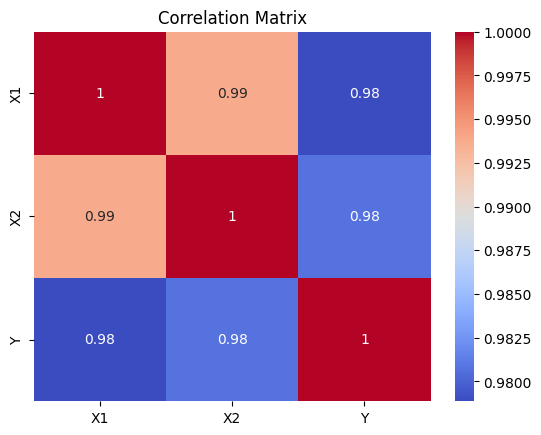

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The heatmap above provides a better understanding/insight into the high correlation between the independent variables.

##Diagonsis
In diagnosing or testing for multicollinearity we can use the following methods:

1.   Variance Inflation Factor (VIF): Calculate the VIF for each independent variable. A high VIF of 5 to 10 indicates multicollinearity.
2.   Correlation Matrix: Just like we have shown above a correlation matrix for high correlations between independent variables helps a lot.
3.   Tolerance (1/VIF): A low tolerance value could indicate multicollinearity.
4.   Eigenvalues: Large condition numbers (that is, the ratios of the largest to smallest eigenvalues) indicate multicollinearity.
5.   Scatter Plots: A visualization using scatter plots helps show the relationships between independent variables using scatter plots.

For example





In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  feature        VIF
0   const   1.008864
1      X1  80.828617
2      X2  80.828617


##Damage

Multicollinearity causes various issues, ranging from the following:


*   Unstable estimates: This is because regression coefficients may have high standard errors, which leads to unstable estimates.
*   Incorrect inference: If multicollinearity is present, we can make incorrect conclusions about the relationships between variables of interest.
*   Poor model performance: Since estimates are highly sensitive to changes in the model due to the presence of multicollinearity, This reduces the model's precision.

##Directions

To address the multicollinearity issue, it is important to consider the following strategies:

*   Remove highly correlated variables: Remove one of the highly correlated variables.
*   The use of dimensionality reduction techniques like principal component analysis (PCA) helps transform predictors into a set of uncorrelated components, thereby reducing the number of independent variables.
*   Regularization techniques: Lasso or Ridge regression performs variable selection by shrinking some coefficients to zero. This can help reduce multicollinearity.


For example, we use ridge regression.


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, df['Y'])
print(ridge_model.coef_)


[0.         2.25910356 2.7702099 ]


##References

Noora Shrestha, “Detecting Multicollinearity in Regression Analysis.” American Journal of Applied Mathematics and Statistics, vol. 8, no. 2 (2020): 39-42. doi: 10.12691/ajams-8-2-1

# Overfitting

Linear Regression R^2: 0.2829
10th-Degree Polynomial Regression R^2: 0.2850


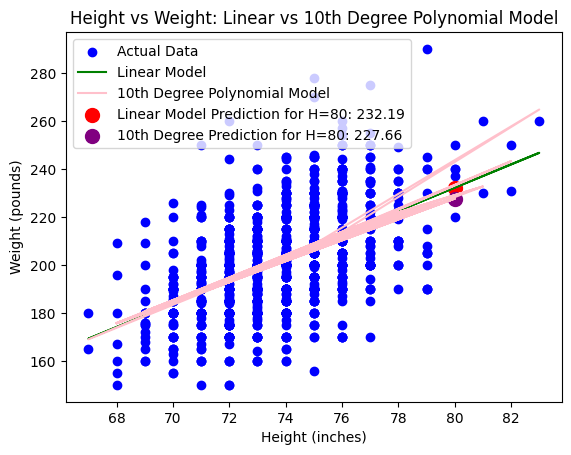

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

file_path = '/content/records.xlsx'
data = pd.read_excel(file_path)

# Clean the data by dropping rows with missing values
data_clean = data.dropna(subset=['Weight(pounds)', 'Height(inches)'])

# Extract relevant columns
X_clean = data_clean['Height(inches)'].values.reshape(-1, 1)
y_clean = data_clean['Weight(pounds)'].values

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_clean, y_clean)
y_pred_linear_clean = linear_model.predict(X_clean)
r2_linear_clean = r2_score(y_clean, y_pred_linear_clean)

# Fit a 10th-degree polynomial regression model
degree = 10
poly_features = PolynomialFeatures(degree=degree)
X_poly_clean = poly_features.fit_transform(X_clean)

poly_model = LinearRegression()
poly_model.fit(X_poly_clean, y_clean)
y_pred_poly_clean = poly_model.predict(X_poly_clean)
r2_poly_clean = r2_score(y_clean, y_pred_poly_clean)

# Print R-squared values
print(f'Linear Regression R^2: {r2_linear_clean:.4f}')
print(f'10th-Degree Polynomial Regression R^2: {r2_poly_clean:.4f}')

# Plot the data and models
plt.scatter(X_clean, y_clean, color='blue', label='Actual Data')
plt.plot(X_clean, y_pred_linear_clean, color='green', label='Linear Model')
plt.plot(X_clean, y_pred_poly_clean, color='pink', label='10th Degree Polynomial Model')

# Mark the predicted point for height = 80 inches for both models
simulated_height = np.array([[80]])  # Example: a height of 80 inches
simulated_height_poly = poly_features.fit_transform(simulated_height)

predicted_weight_linear = linear_model.predict(simulated_height)
predicted_weight_poly = poly_model.predict(simulated_height_poly)

plt.scatter([80], predicted_weight_linear, color='red', label=f'Linear Model Prediction for H=80: {predicted_weight_linear[0]:.2f}', s=100)
plt.scatter([80], predicted_weight_poly, color='purple', label=f'10th Degree Prediction for H=80: {predicted_weight_poly[0]:.2f}', s=100)

# Set plot labels and title
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight: Linear vs 10th Degree Polynomial Model')
plt.legend()
plt.show()

# Sensitivity to outliers


Including Outliers:
Mean Weight: 201.69 pounds
Median Weight: 200.00 pounds
Standard Deviation: 20.98 pounds

Excluding Outliers:
Mean Weight: 201.39 pounds
Median Weight: 200.00 pounds
Standard Deviation: 20.47 pounds

Mean Cook's Distance: 0.000976


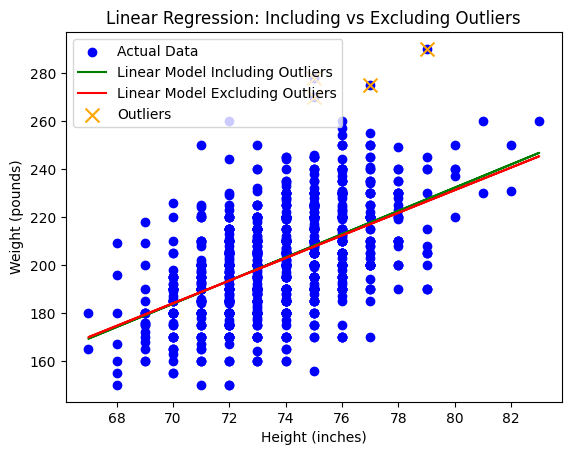

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

# Load the dataset
file_path = '/content/records.xlsx'
data = pd.read_excel(file_path)

# Clean the data by dropping rows with missing values
data_clean = data.dropna(subset=['Weight(pounds)', 'Height(inches)'])

# Categorize anything above 260 pounds as outliers
outliers = data_clean[data_clean['Weight(pounds)'] > 260]

# Data excluding outliers
data_no_outliers = data_clean[data_clean['Weight(pounds)'] <= 260]

# Key metrics including outliers
mean_weight_incl = np.mean(data_clean['Weight(pounds)'])
median_weight_incl = np.median(data_clean['Weight(pounds)'])
std_weight_incl = np.std(data_clean['Weight(pounds)'])

# Key metrics excluding outliers
mean_weight_excl = np.mean(data_no_outliers['Weight(pounds)'])
median_weight_excl = np.median(data_no_outliers['Weight(pounds)'])
std_weight_excl = np.std(data_no_outliers['Weight(pounds)'])

print("Including Outliers:")
print(f"Mean Weight: {mean_weight_incl:.2f} pounds")
print(f"Median Weight: {median_weight_incl:.2f} pounds")
print(f"Standard Deviation: {std_weight_incl:.2f} pounds")

print("\nExcluding Outliers:")
print(f"Mean Weight: {mean_weight_excl:.2f} pounds")
print(f"Median Weight: {median_weight_excl:.2f} pounds")
print(f"Standard Deviation: {std_weight_excl:.2f} pounds")

# Fit a linear model to calculate Cook's Distance
X = data_clean['Height(inches)']
y = data_clean['Weight(pounds)']
X = sm.add_constant(X)  # Add a constant term to the model

model = sm.OLS(y, X).fit()
influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]

# Calculate the mean Cook's Distance
mean_cooks_d = np.mean(cooks_d)
print(f"\nMean Cook's Distance: {mean_cooks_d:.6f}")

# Extract the relevant columns for data excluding outliers
X_clean = data_clean['Height(inches)'].values.reshape(-1, 1)
y_clean = data_clean['Weight(pounds)'].values
X_no_outliers = data_no_outliers['Height(inches)'].values.reshape(-1, 1)
y_no_outliers = data_no_outliers['Weight(pounds)'].values

# Fit linear regression models
linear_model_incl = LinearRegression()
linear_model_excl = LinearRegression()

# Fit the models
linear_model_incl.fit(X_clean, y_clean)
linear_model_excl.fit(X_no_outliers, y_no_outliers)

# Predictions
y_pred_incl = linear_model_incl.predict(X_clean)
y_pred_excl = linear_model_excl.predict(X_clean)

# Plot the data points and the regression lines
plt.scatter(X_clean, y_clean, color='blue', label='Actual Data')

# Plot the linear regression line including outliers
plt.plot(X_clean, y_pred_incl, color='green', label='Linear Model Including Outliers')

# Plot the linear regression line excluding outliers
plt.plot(X_clean, y_pred_excl, color='red', label='Linear Model Excluding Outliers')

# Highlight the outliers
plt.scatter(outliers['Height(inches)'], outliers['Weight(pounds)'], color='orange', label='Outliers', s=100, marker='x')

# Set plot labels and title
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Linear Regression: Including vs Excluding Outliers')
plt.legend()
plt.show()